<a href="https://colab.research.google.com/github/mborkhat/Data-Science-Projects/blob/master/FastAI_Pneumonia/xray_chest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
pwd

'/content'

In [ ]:
cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip  && rm *.zip

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set path to root directory
path = Path('/content/gdrive/My Drive/Kaggle/chest_xray')
# View all files in directory
path.ls()

[PosixPath('/content/gdrive/My Drive/Kaggle/chest_xray/__MACOSX'),
 PosixPath('/content/gdrive/My Drive/Kaggle/chest_xray/chest_xray'),
 PosixPath('/content/gdrive/My Drive/Kaggle/chest_xray/test'),
 PosixPath('/content/gdrive/My Drive/Kaggle/chest_xray/train'),
 PosixPath('/content/gdrive/My Drive/Kaggle/chest_xray/val')]

In [ ]:
# We are creating a fastai DataBunch from our dataset
# Preprocessing takes place when creating the databunch
# May need to decrease batch size and num_workers depending on GPU
data = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)

['NORMAL', 'PNEUMONIA'] 2
5216 624


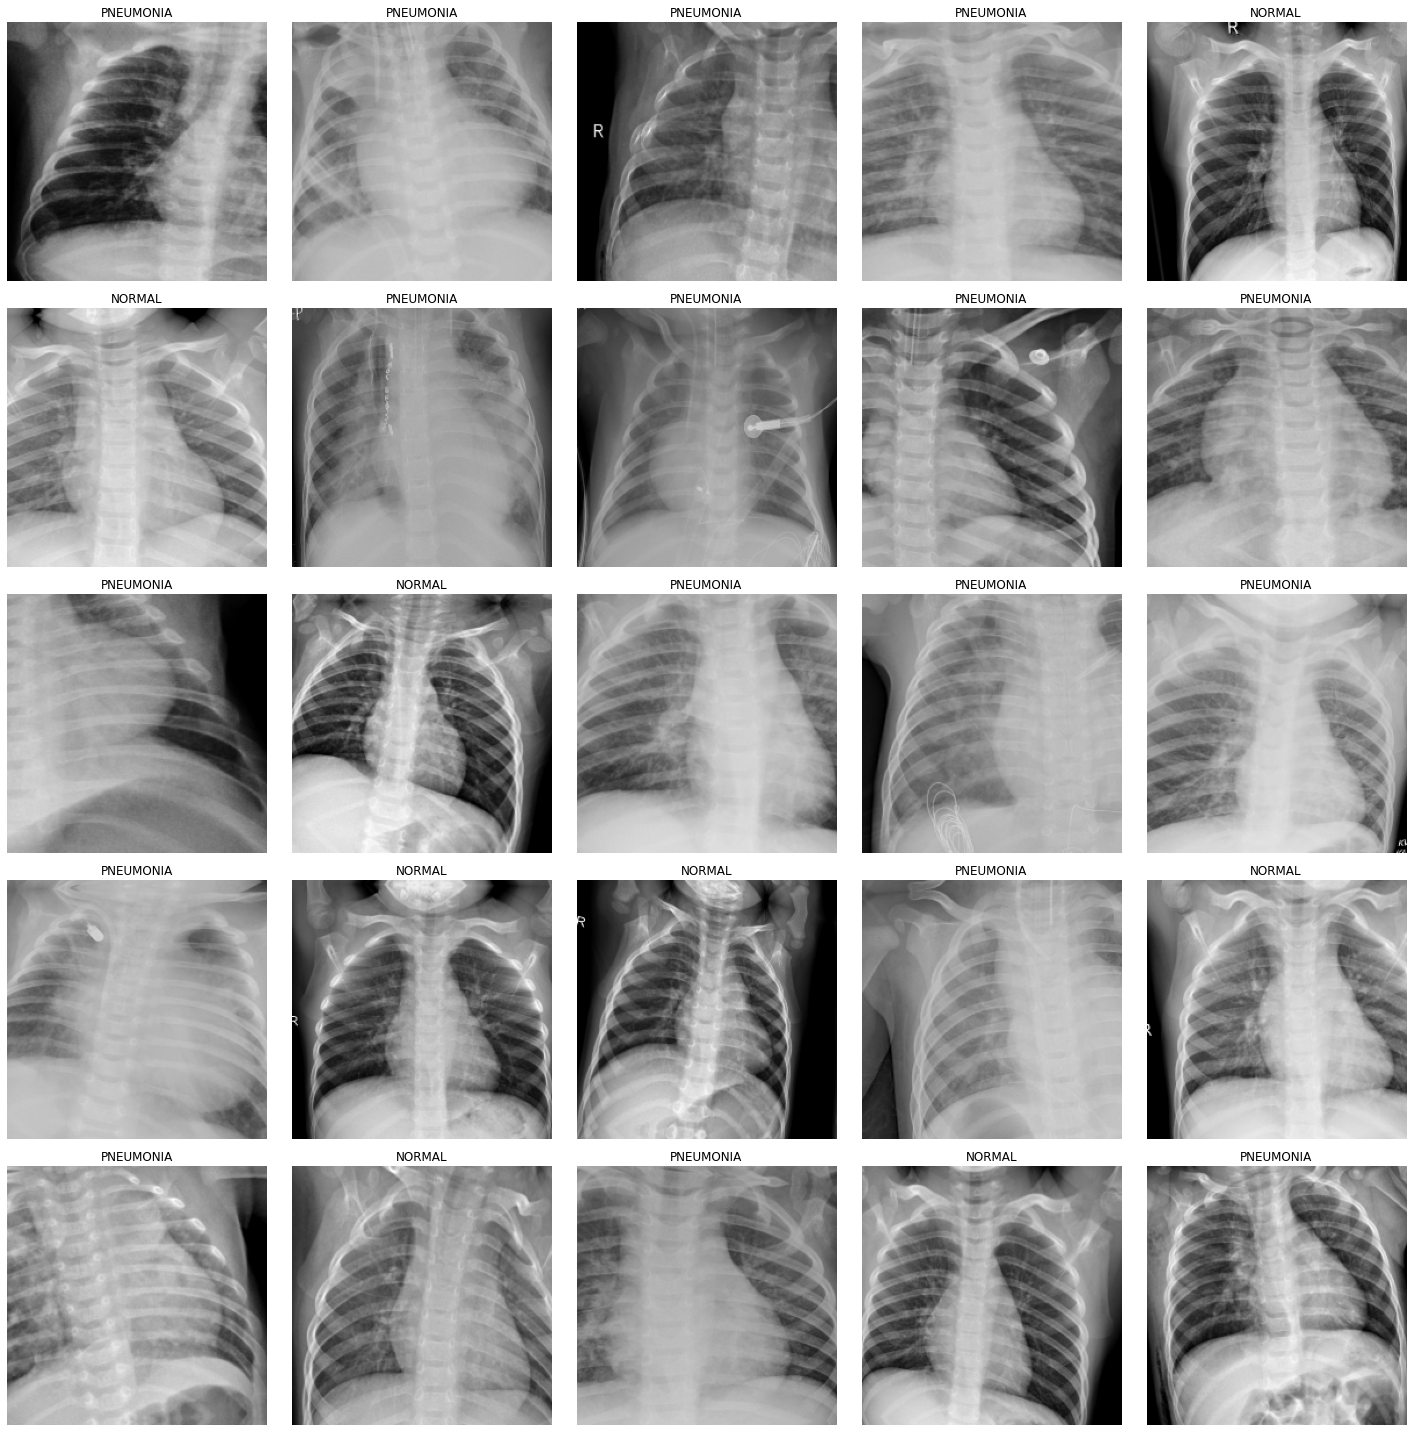

In [ ]:
# Show what the data looks like after being transformed
data.show_batch()
# See the classes and count of classes in your dataset
print(data.classes,data.c)
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

In [ ]:
# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])
# Train the model on 4 epochs of data at the default learning rate
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.451907,0.744871,0.802885,03:48
1,0.268970,0.311359,0.894231,03:43
2,0.182165,0.314878,0.894231,03:43
3,0.164097,0.274329,0.894231,03:43


In [ ]:
# Save the model
learn.save('stage-1')
# Load the Model
learn.load('stage-1')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 4.37E-06


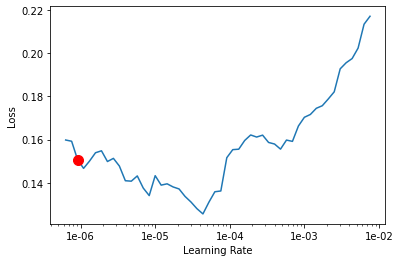

In [ ]:
# Unfreeze all layers of the CNN
learn.unfreeze()
# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.137016,0.307776,0.892628,03:44
1,0.131886,0.283525,0.895833,03:46


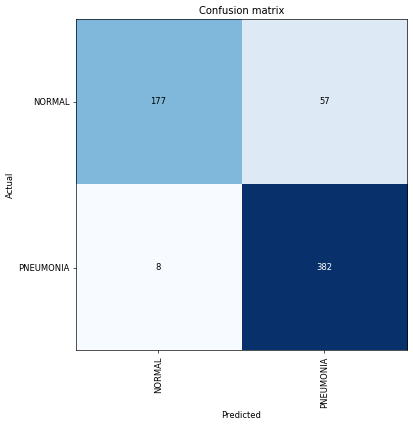

In [ ]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('NORMAL', 'PNEUMONIA', 57), ('PNEUMONIA', 'NORMAL', 8)]